In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.drop('_c39',axis=1,inplace=True)

In [8]:
df.replace({'collision_type':{'?' : 'Rear Collision'}},inplace=True)

In [9]:
df.replace({'police_report_available':{'?' : 'NO'}},inplace=True)

In [10]:
df.replace({'property_damage':{'?' : 'NO'}},inplace=True)

In [11]:
df.drop('policy_number',axis=1,inplace=True)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

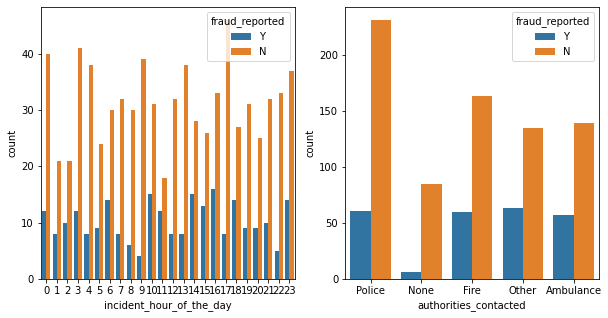

In [12]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot('incident_hour_of_the_day', hue = 'fraud_reported', data = df)

plt.subplot(1,2,2)
sns.countplot('authorities_contacted', hue = 'fraud_reported', data = df)

In [13]:
feature = ['policy_state', 'policy_csl', 'policy_deductable', 'umbrella_limit', 'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries','witnesses','police_report_available', 'auto_make', 'auto_model']

In [14]:
list(enumerate(feature))

[(0, 'policy_state'),
 (1, 'policy_csl'),
 (2, 'policy_deductable'),
 (3, 'umbrella_limit'),
 (4, 'insured_sex'),
 (5, 'insured_education_level'),
 (6, 'insured_occupation'),
 (7, 'insured_hobbies'),
 (8, 'insured_relationship'),
 (9, 'incident_type'),
 (10, 'collision_type'),
 (11, 'incident_severity'),
 (12, 'authorities_contacted'),
 (13, 'incident_state'),
 (14, 'incident_city'),
 (15, 'incident_location'),
 (16, 'number_of_vehicles_involved'),
 (17, 'property_damage'),
 (18, 'bodily_injuries'),
 (19, 'witnesses'),
 (20, 'police_report_available'),
 (21, 'auto_make'),
 (22, 'auto_model')]

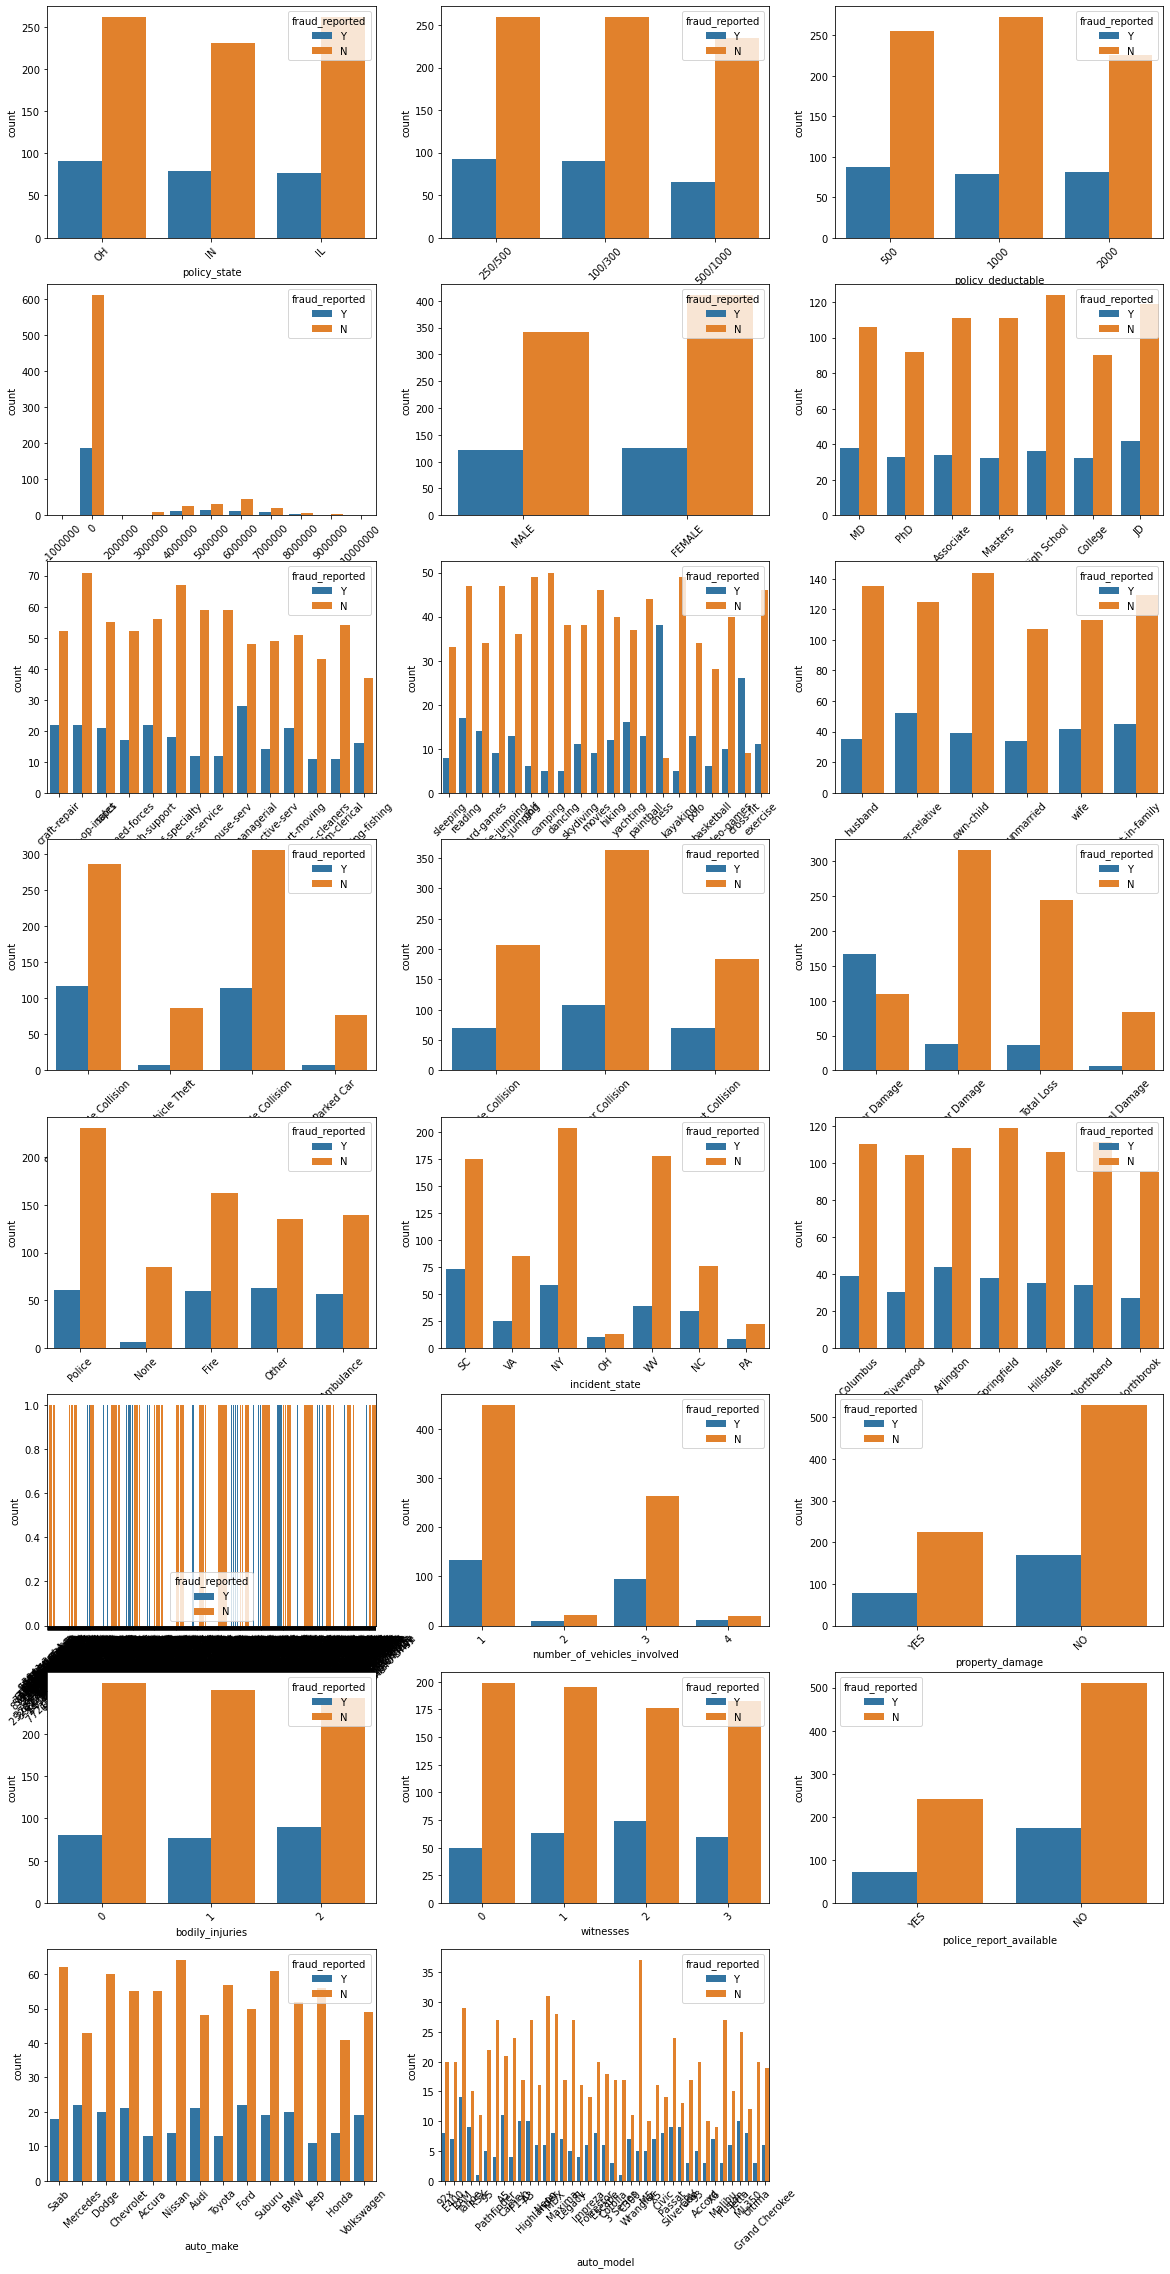

In [15]:
plt.figure(figsize = (20, 40))
for i in enumerate(feature):
    plt.subplot(8, 3,i[0]+1)
    sns.countplot(i[1], hue = 'fraud_reported', data = df)
    plt.xticks(rotation = 45)

Fraud is more when there is no police report available.
Fraud is almost equal in all the parameters in the dataset.

<AxesSubplot:xlabel='auto_make', ylabel='count'>

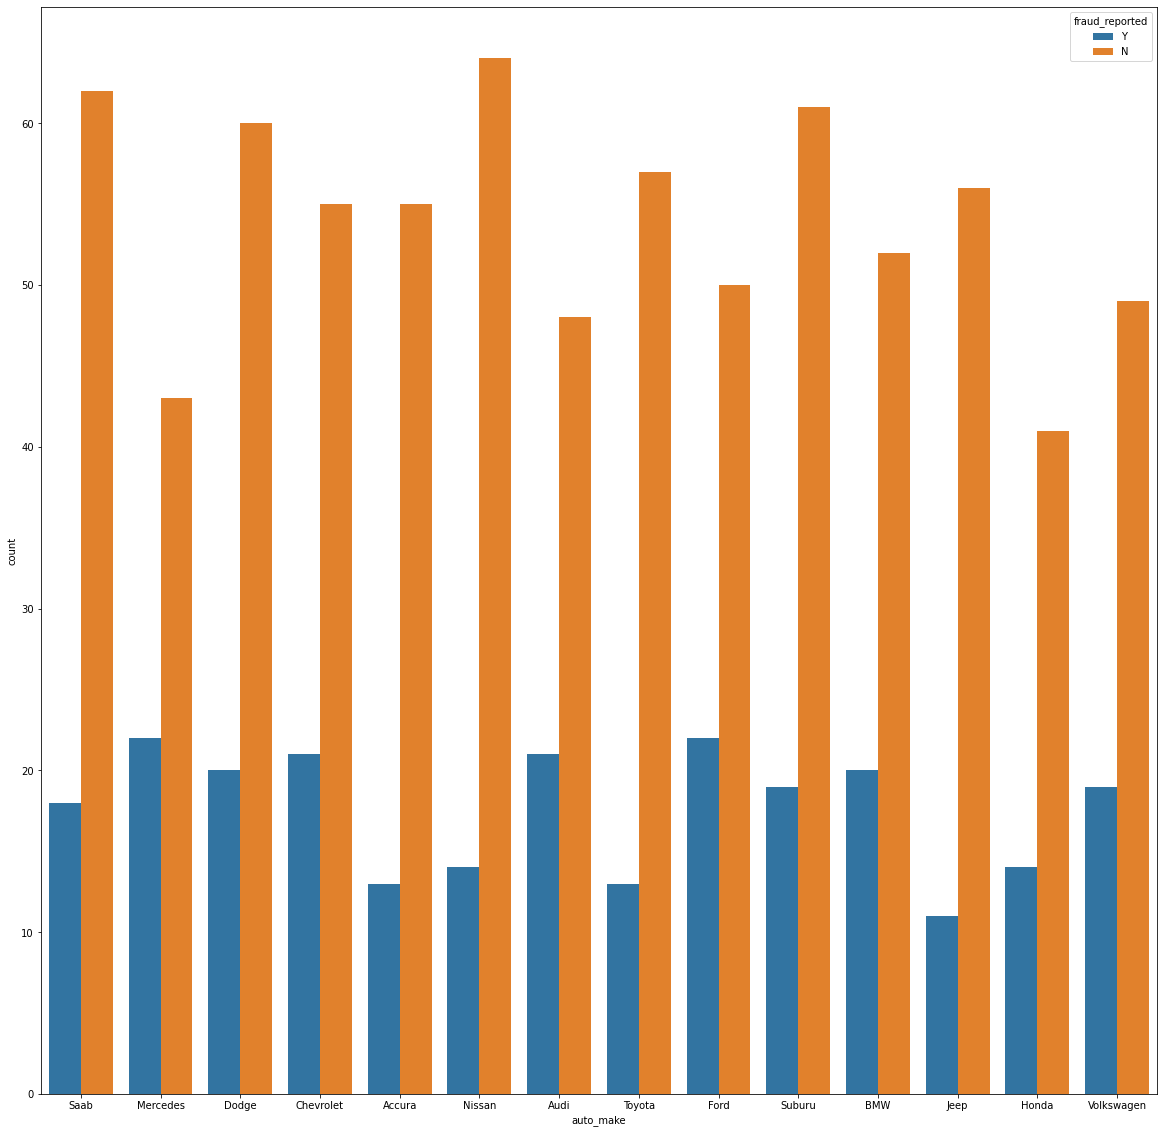

In [16]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

There is evident fraud in almost all brands.

In [17]:
df['bodily_injury']=df["policy_csl"].str.split("/").str.get(0).str.title()

In [18]:
df['max_amt_per_acc']=df["policy_csl"].str.split("/").str.get(1).str.title()

In [19]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,bodily_injury,max_amt_per_acc
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,250,500
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,250,500
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,100,300
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,250,500
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,500,1000


In [20]:
df.drop('policy_csl',axis=1,inplace=True)

In [21]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [22]:
df.drop('incident_date',axis=1,inplace=True)

In [23]:
df.drop('umbrella_limit',axis=1,inplace=True)

Dropped umbrella_limit as more than 80% data is 0

In [24]:
df.drop('insured_hobbies',axis=1,inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
features = ['policy_state', 'policy_deductable', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries','witnesses','police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

In [27]:
for var in features:
    le=LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))

In [28]:
df['bodily_injury']= df['bodily_injury'].astype(float)

In [29]:
df['max_amt_per_acc']= df['max_amt_per_acc'].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int64  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   insured_zip                  1000 non-null   int64  
 6   insured_sex                  1000 non-null   int64  
 7   insured_education_level      1000 non-null   int64  
 8   insured_occupation           1000 non-null   int64  
 9   insured_relationship         1000 non-null   int64  
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   int64  
 13  collision_type     

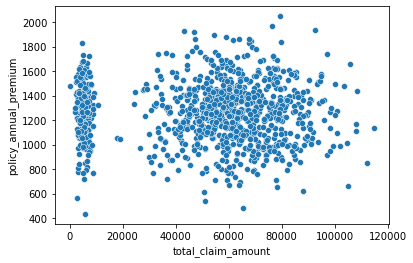

In [32]:
sns.scatterplot(data=df, x='total_claim_amount', y='policy_annual_premium');

Total claim amount does not increase with policy annual premium

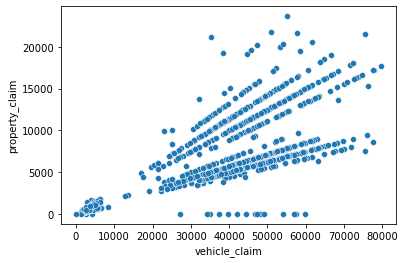

In [33]:
sns.scatterplot(data=df, x='vehicle_claim', y='property_claim');

Veichle claim is more than property claim.

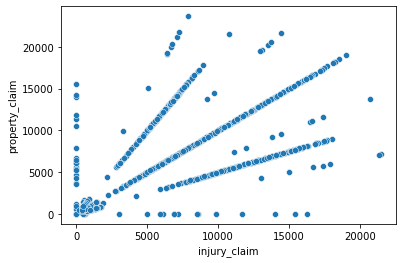

In [34]:
sns.scatterplot(data=df, x='injury_claim', y='property_claim');

Both claims are equal

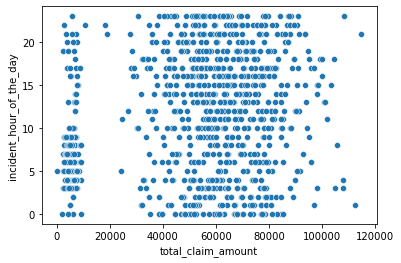

In [35]:
sns.scatterplot(data=df, x='total_claim_amount', y='incident_hour_of_the_day');

Fraud occous in all hours of the day.

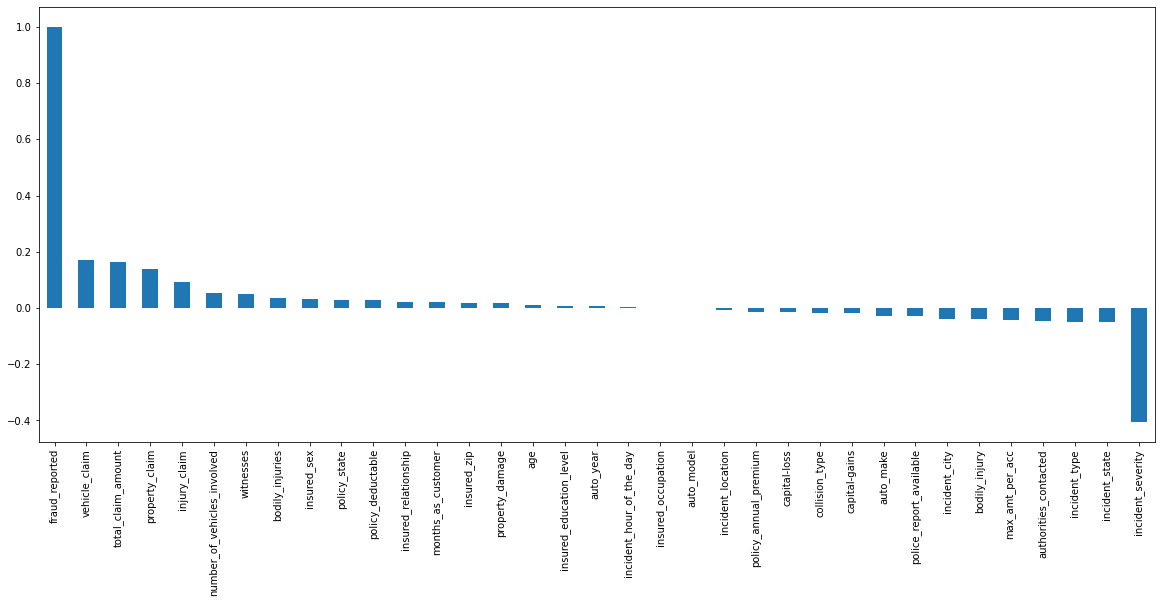

In [36]:
plt.figure(figsize=(20,8))
df.corr()['fraud_reported'].sort_values(ascending = False).plot(kind='bar');

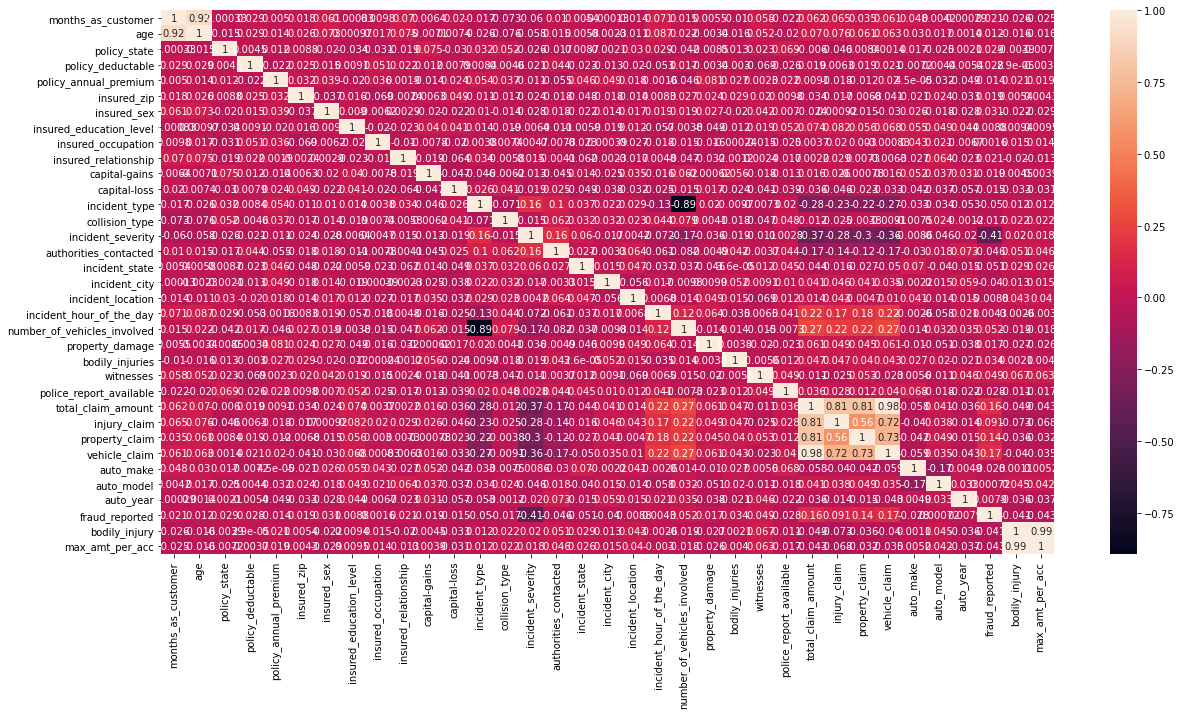

In [37]:
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [38]:
corr_matrix = df.corr()
corr_matrix["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
policy_deductable              0.028477
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480
capital-loss                  -0.014863
collision_type                -0.017315


insured_zip,insured_education_level,auto_year, incident_hour_of_the_day,insured_occupation,auto_model,incident_location have no correlation. so can be dropped.

In [39]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.016859
policy_annual_premium          0.004402
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


In [40]:
df.drop(['insured_education_level', 'auto_year', 'incident_hour_of_the_day', 'insured_occupation', 'auto_model', 'incident_location'],axis=1,inplace=True)

In [41]:
y = df['fraud_reported']
X = df.drop(columns = ['fraud_reported'])

In [42]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [43]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
       maxAccu=acc
       maxRS = i
print ("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.8381962864721485 on Random_state 93


In [46]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = maxRS)

In [47]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8381962864721485
[[157  30]
 [ 31 159]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       187
           1       0.84      0.84      0.84       190

    accuracy                           0.84       377
   macro avg       0.84      0.84      0.84       377
weighted avg       0.84      0.84      0.84       377



In [48]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt = DT.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.76657824933687
[[141  46]
 [ 42 148]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       187
           1       0.76      0.78      0.77       190

    accuracy                           0.77       377
   macro avg       0.77      0.77      0.77       377
weighted avg       0.77      0.77      0.77       377



In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.896551724137931
[[174  13]
 [ 26 164]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       187
           1       0.93      0.86      0.89       190

    accuracy                           0.90       377
   macro avg       0.90      0.90      0.90       377
weighted avg       0.90      0.90      0.90       377



In [50]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.896551724137931
[[174  13]
 [ 26 164]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       187
           1       0.93      0.86      0.89       190

    accuracy                           0.90       377
   macro avg       0.90      0.90      0.90       377
weighted avg       0.90      0.90      0.90       377



In [51]:
from sklearn.model_selection import cross_val_score

rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of LogisticRegression model :", rwr.mean())

Cross validation score of LogisticRegression model : 0.584312776396559


In [52]:
rwr=cross_val_score(DT, X, y, cv=5)
print("Cross validation score of DecisionTree model :", rwr.mean())

Cross validation score of DecisionTree model : 0.7829530703394865


In [53]:
rwr=cross_val_score(rf, X, y, cv=5)
print("Cross validation score of RandomForest model :", rwr.mean())

Cross validation score of RandomForest model : 0.8553409165914942


In [54]:
rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of SVC model :", rwr.mean())

Cross validation score of SVC model : 0.584312776396559


In [55]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [56]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All models are trained")

All models are trained


In [57]:
LR.score(x_test,y_test)
DT.score(x_test,y_test)
rf.score(x_test,y_test)
svc.score(x_test,y_test)

print("All models test scores captured")

All models test scores captured


In [58]:
roc_auc_score(y_test,LR.predict(x_test))

0.8382071488882635

In [59]:
roc_auc_score(y_test,DT.predict(x_test))

0.7532367013791162

In [60]:
roc_auc_score(y_test,rf.predict(x_test))

0.8782718829158457

In [61]:
roc_auc_score(y_test,svc.predict(x_test))

0.8677033492822968

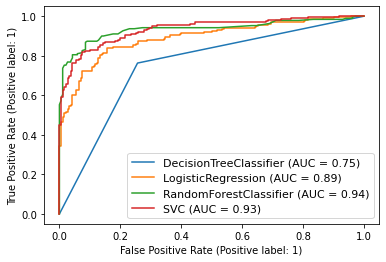

In [62]:
disp=plot_roc_curve(DT,x_test,y_test)

plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

In [63]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [200, 800], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4,5,6,7,8],
              'criterion': ['gini','entropy']}

In [64]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs=-1)

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 800]})

In [66]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [67]:
model=RandomForestClassifier(criterion= 'gini',
 max_depth= 8,
 max_features= 'log2',
 n_estimators= 200)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

87.26790450928382


In [68]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf, open(filename, 'wb'))

RandomForestClassifier is my best model.